# Window selection of the pseudo WV and the adaptive algorithm
last update: 9/30 (2017)

In [1]:
using Distributions
import DSP

In [2]:
include("../juwvid.jl")

juwvid

## Window Size dependence of the Pseudo Wigner Ville Distribution

### generating the signal with the nonlinear IF

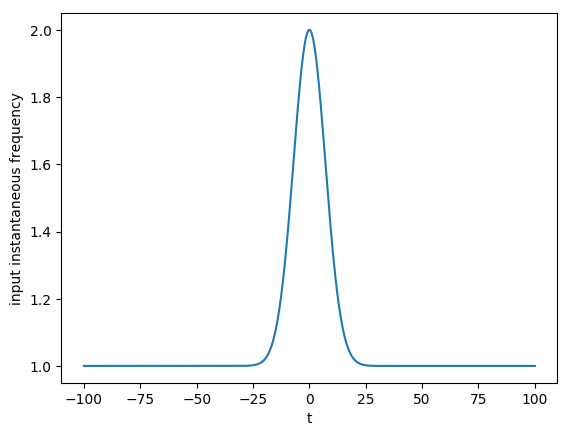

PyObject <matplotlib.text.Text object at 0x7ff38dff5240>

In [3]:
nsample=1024
x=collect(linspace(-100,100,nsample));
ifreq=exp.(-(x.*x)/100) + 1;
PyPlot.plot(x,ifreq)
PyPlot.xlabel("t")
PyPlot.ylabel("input instantaneous frequency")

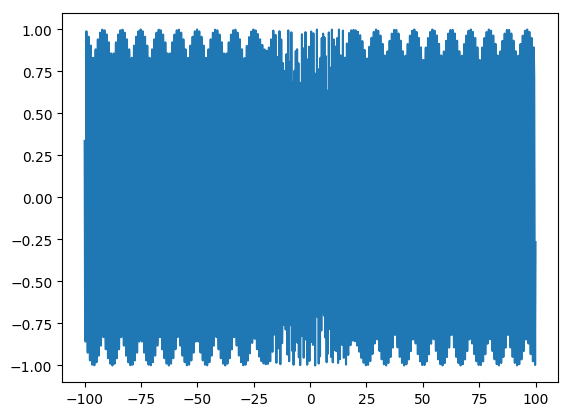

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7ff38df17ef0>

In [4]:
iw=2*pi*ifreq;
phase=cumsum(iw)/nsample*(x[end]-x[1]);
y=cos.(phase);
PyPlot.plot(x,y)

In [6]:
z=DSP.Util.hilbert(y);
tfrp4=cohenclass.tfrpwv(z,NaN,NaN,NaN,NaN,NaN,0,"fft",4);
indf4=extif.maxif(abs.(tfrp4));
fn4=juwutils.index_to_frequency(indf4, NaN, x[2]-x[1],nsample);

tfrp8=cohenclass.tfrpwv(z,NaN,NaN,NaN,NaN,NaN,0,"fft",8);
indf8=extif.maxif(abs.(tfrp8));
fn8=juwutils.index_to_frequency(indf8, NaN, x[2]-x[1],nsample);

tfrp16=cohenclass.tfrpwv(z,NaN,NaN,NaN,NaN,NaN,0,"fft",16);
indf16=extif.maxif(abs.(tfrp16));
fn16=juwutils.index_to_frequency(indf16, NaN, x[2]-x[1],nsample);

tfrp32=cohenclass.tfrpwv(z,NaN,NaN,NaN,NaN,NaN,0,"fft",32);
indf32=extif.maxif(abs.(tfrp32));
fn32=juwutils.index_to_frequency(indf32, NaN, x[2]-x[1],nsample);

Single pseudo Wigner Ville
Use fft.
Assuming nft = nsample.
Single pseudo Wigner Ville
Use fft.
Assuming nft = nsample.
Single pseudo Wigner Ville
Use fft.
Assuming nft = nsample.
Single pseudo Wigner Ville
Use fft.
Assuming nft = nsample.


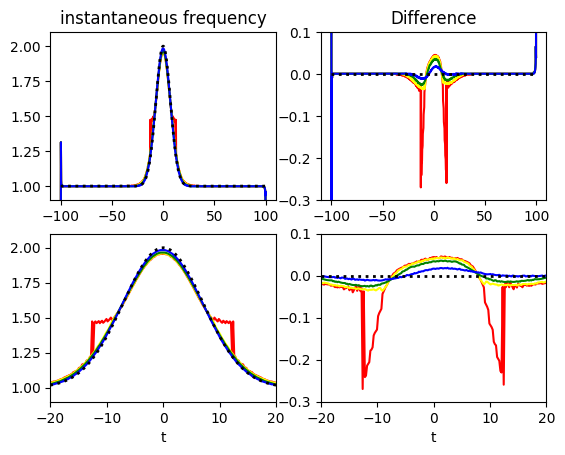

PyObject <matplotlib.text.Text object at 0x7ff3850255f8>

In [7]:
fig=PyPlot.figure()
ax = fig[:add_subplot](2,2,1)
PyPlot.plot(x,fn4,color="red")
PyPlot.plot(x,fn8,color="yellow")
PyPlot.plot(x,fn16,color="green")
PyPlot.plot(x,fn32,color="blue")
PyPlot.plot(x,ifreq,lw=2,ls="dotted",color="black")
PyPlot.ylim(0.9,2.1)
PyPlot.title("instantaneous frequency")
ax = fig[:add_subplot](2,2,2)
PyPlot.plot(x,ifreq-fn4,color="red")
PyPlot.plot(x,ifreq-fn8,color="yellow")
PyPlot.plot(x,ifreq-fn16,color="green")
PyPlot.plot(x,ifreq-fn32,color="blue")
PyPlot.plot(x,ifreq-ifreq,lw=2,ls="dotted",color="black")
PyPlot.ylim(-0.3,0.1)
PyPlot.title("Difference")
ax = fig[:add_subplot](2,2,3)
PyPlot.plot(x,fn4,color="red")
PyPlot.plot(x,fn8,color="yellow")
PyPlot.plot(x,fn16,color="green")
PyPlot.plot(x,fn32,color="blue")
PyPlot.plot(x,ifreq,lw=2,ls="dotted",color="black")
PyPlot.ylim(0.9,2.1)
PyPlot.xlim(-20.0,20.0)
PyPlot.xlabel("t")
ax = fig[:add_subplot](2,2,4)
PyPlot.plot(x,ifreq-fn4,color="red")
PyPlot.plot(x,ifreq-fn8,color="yellow")
PyPlot.plot(x,ifreq-fn16,color="green")
PyPlot.plot(x,ifreq-fn32,color="blue")
PyPlot.plot(x,ifreq-ifreq,lw=2,ls="dotted",color="black")
PyPlot.ylim(-0.3,0.1)
PyPlot.xlim(-20.0,20.0)
PyPlot.xlabel("t")

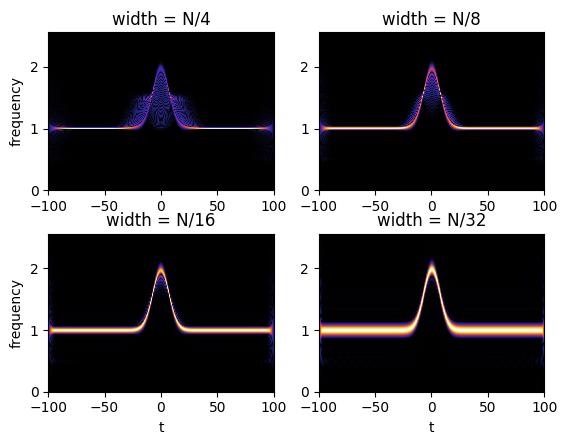

PyObject <matplotlib.text.Text object at 0x7ff38d1373c8>

In [8]:
# Figure 3
fig=PyPlot.figure()
ax = fig[:add_subplot](2,2,1)
a=juwplot.tfrshow(abs.(tfrp4),x[2]-x[1],x[1],x[end],NaN,NaN,0.7)
PyPlot.ylabel("frequency")
PyPlot.title("width = N/4")
ax = fig[:add_subplot](2,2,2)
a=juwplot.tfrshow(abs.(tfrp8),x[2]-x[1],x[1],x[end],NaN,NaN,0.7)
PyPlot.title("width = N/8")
ax = fig[:add_subplot](2,2,3)
a=juwplot.tfrshow(abs.(tfrp16),x[2]-x[1],x[1],x[end],NaN,NaN,0.7)
PyPlot.xlabel("t")
PyPlot.ylabel("frequency")
PyPlot.title("width = N/16")
ax = fig[:add_subplot](2,2,4)
a=juwplot.tfrshow(abs.(tfrp32),x[2]-x[1],x[1],x[end],NaN,NaN,0.7)
PyPlot.xlabel("t")
PyPlot.title("width = N/32")

### ADDING Gaussian noises

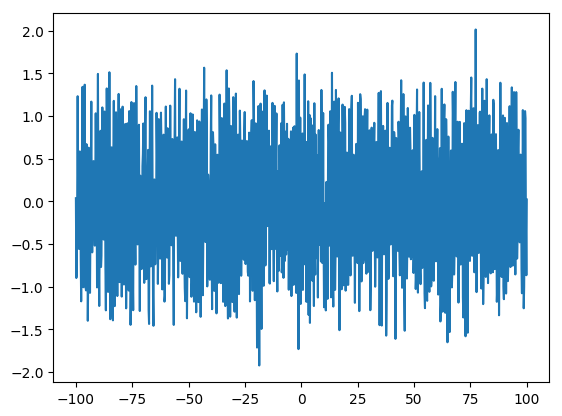

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7ff38d08c400>

In [9]:
using Distributions
d = Normal()
ynoise=y+rand(d,nsample)*std(y)*0.5
PyPlot.plot(x,ynoise)

In [10]:
z=DSP.Util.hilbert(ynoise);
tfrp4=cohenclass.tfrpwv(z,NaN,NaN,NaN,NaN,NaN,0,"fft",4);
indf4=extif.maxif(abs.(tfrp4));
fn4=juwutils.index_to_frequency(indf4, NaN, x[2]-x[1],nsample);

tfrp8=cohenclass.tfrpwv(z,NaN,NaN,NaN,NaN,NaN,0,"fft",8);
indf8=extif.maxif(abs.(tfrp8));
fn8=juwutils.index_to_frequency(indf8, NaN, x[2]-x[1],nsample);

tfrp16=cohenclass.tfrpwv(z,NaN,NaN,NaN,NaN,NaN,0,"fft",16);
indf16=extif.maxif(abs.(tfrp16));
fn16=juwutils.index_to_frequency(indf16, NaN, x[2]-x[1],nsample);

tfrp32=cohenclass.tfrpwv(z,NaN,NaN,NaN,NaN,NaN,0,"fft",32);
indf32=extif.maxif(abs.(tfrp32));
fn32=juwutils.index_to_frequency(indf32, NaN, x[2]-x[1],nsample);

Single pseudo Wigner Ville
Use fft.
Assuming nft = nsample.
Single pseudo Wigner Ville
Use fft.
Assuming nft = nsample.
Single pseudo Wigner Ville
Use fft.
Assuming nft = nsample.
Single pseudo Wigner Ville
Use fft.
Assuming nft = nsample.


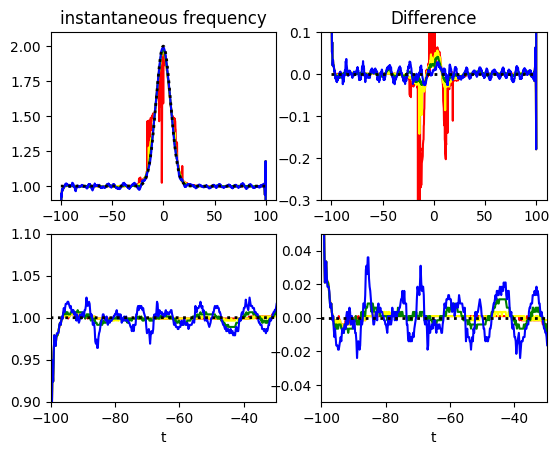

PyObject <matplotlib.text.Text object at 0x7ff38ce9a6d8>

In [11]:
fig=PyPlot.figure()
ax = fig[:add_subplot](2,2,1)
PyPlot.plot(x,fn4,color="red")
PyPlot.plot(x,fn8,color="yellow")
PyPlot.plot(x,fn16,color="green")
PyPlot.plot(x,fn32,color="blue")
PyPlot.plot(x,ifreq,lw=2,ls="dotted",color="black")
PyPlot.ylim(0.9,2.1)
PyPlot.title("instantaneous frequency")
ax = fig[:add_subplot](2,2,2)
PyPlot.plot(x,ifreq-fn4,color="red")
PyPlot.plot(x,ifreq-fn8,color="yellow")
PyPlot.plot(x,ifreq-fn16,color="green")
PyPlot.plot(x,ifreq-fn32,color="blue")
PyPlot.plot(x,ifreq-ifreq,lw=2,ls="dotted",color="black")
PyPlot.ylim(-0.3,0.1)
PyPlot.title("Difference")
ax = fig[:add_subplot](2,2,3)
PyPlot.plot(x,fn4,color="red")
PyPlot.plot(x,fn8,color="yellow")
PyPlot.plot(x,fn16,color="green")
PyPlot.plot(x,fn32,color="blue")
PyPlot.plot(x,ifreq,lw=2,ls="dotted",color="black")
PyPlot.ylim(0.9,1.1)
PyPlot.xlim(-100.0,-30.0)
PyPlot.xlabel("t")
ax = fig[:add_subplot](2,2,4)
PyPlot.plot(x,ifreq-fn4,color="red")
PyPlot.plot(x,ifreq-fn8,color="yellow")
PyPlot.plot(x,ifreq-fn16,color="green")
PyPlot.plot(x,ifreq-fn32,color="blue")
PyPlot.plot(x,ifreq-ifreq,lw=2,ls="dotted",color="black")
PyPlot.ylim(-0.05,0.05)
PyPlot.xlim(-100.0,-30.0)
PyPlot.xlabel("t")

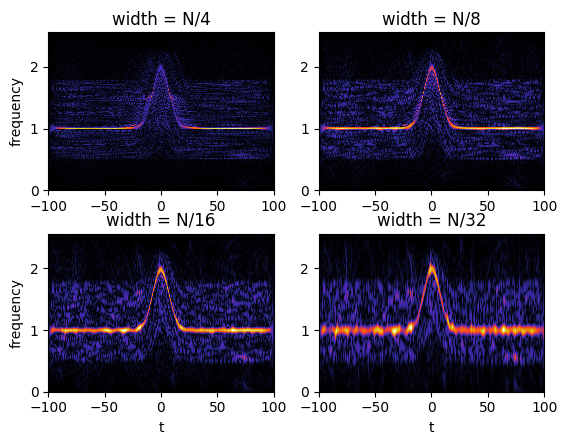

PyObject <matplotlib.text.Text object at 0x7ff38cc59908>

In [12]:
fig=PyPlot.figure()
ax = fig[:add_subplot](2,2,1)
a=juwplot.tfrshow(abs.(tfrp4),x[2]-x[1],x[1],x[end],NaN,NaN,0.7)
PyPlot.ylabel("frequency")
PyPlot.title("width = N/4")
ax = fig[:add_subplot](2,2,2)
a=juwplot.tfrshow(abs.(tfrp8),x[2]-x[1],x[1],x[end],NaN,NaN,0.7)
PyPlot.title("width = N/8")
ax = fig[:add_subplot](2,2,3)
a=juwplot.tfrshow(abs.(tfrp16),x[2]-x[1],x[1],x[end],NaN,NaN,0.7)
PyPlot.xlabel("t")
PyPlot.ylabel("frequency")
PyPlot.title("width = N/16")
ax = fig[:add_subplot](2,2,4)
a=juwplot.tfrshow(abs.(tfrp32),x[2]-x[1],x[1],x[end],NaN,NaN,0.7)
PyPlot.xlabel("t")
PyPlot.title("width = N/32")

## An adaptive algorithm of pseudo Wigner-Ville Distribution

#### This sample aims to reproduce Figure 5.3 of the book "Time-frequency signal analysis with applications" by Stankovic, Dakovic, and Thayaparan. 


#### Generating sample data with Gaussian noise

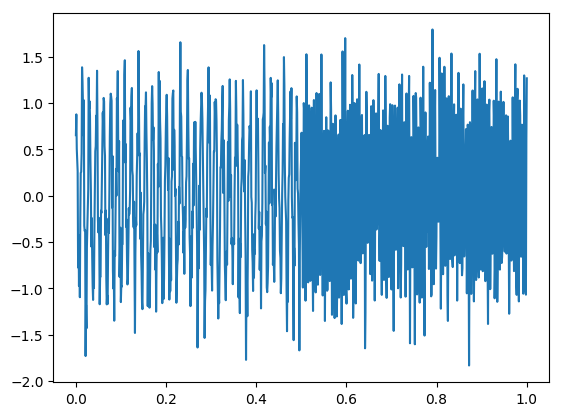

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7ff38cb49b38>

In [14]:
nsample=1024
x,z,iw,ynorm=sampledata.genstepfm(nsample);
d = Normal()
ynoise=real(z)+rand(d,nsample)/3.16
nsample=length(x);dx=x[2]-x[1]
PyPlot.plot(x,ynoise)

#### Input Instantaneous Frequency 

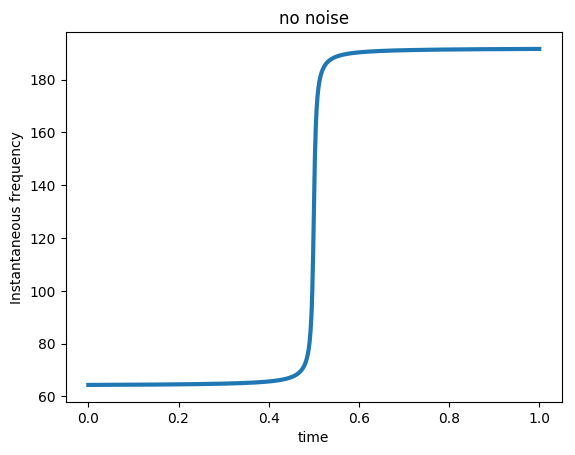

PyObject <matplotlib.text.Text object at 0x7ff38cbc9ba8>

In [15]:
PyPlot.plot(x,iw/(2*pi),lw=3)
PyPlot.title("no noise")
PyPlot.xlabel("time")
PyPlot.ylabel("Instantaneous frequency")

### Wigner Ville Distribution 

Single Wigner Ville


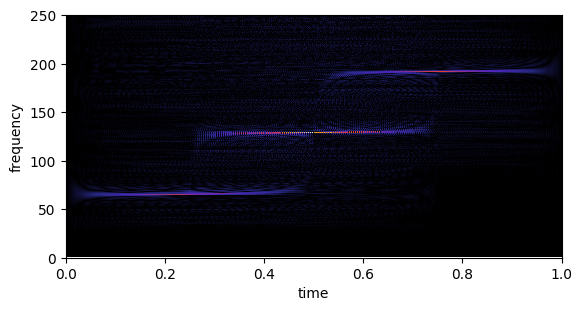

Use fft.


(0, 250)

In [17]:
### one can see large artifact in the middle of time.
z=DSP.Util.hilbert(ynoise);
tfr=cohenclass.tfrwv(z);
indfwv=extif.maxif(abs.(tfr));

fig=PyPlot.figure()
a=juwplot.tfrshow(abs.(tfr),dx,x[1],x[end],NaN,NaN,1.0)
PyPlot.xlabel("time")
PyPlot.ylabel("frequency")
PyPlot.ylim(0,250)

### The Pseudo Wigner Ville with N/4 window and N/16
- you can see a smoothing effect for a narrow width

Single pseudo Wigner Ville


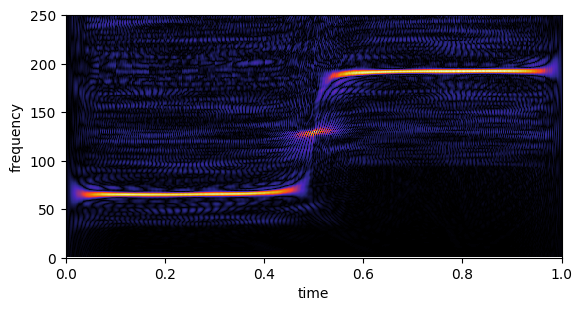

Use fft.


(0, 250)

In [19]:
# window size=256 (default window size of tfrpwv=N/4 )
tfrp=cohenclass.tfrpwv(z)
indfpwv256=extif.maxif(abs.(tfrp))
fig=PyPlot.figure()
a=juwplot.tfrshow(abs.(tfrp),dx,x[1],x[end],NaN,NaN,1.0)
PyPlot.xlabel("time")
PyPlot.ylabel("frequency")
PyPlot.ylim(0,250)

Single pseudo Wigner Ville


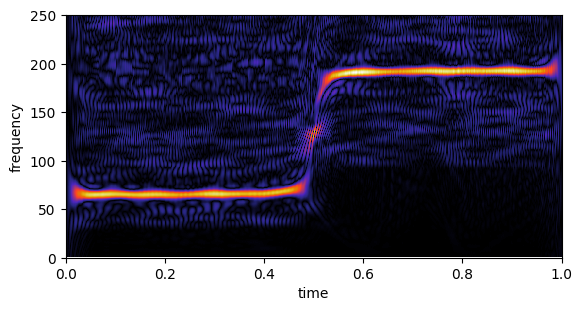

Use fft.


(0, 250)

In [20]:
# window size=N/8 
tfrp=cohenclass.tfrpwv(z,NaN,NaN,NaN,NaN,NaN,0,"fft",8)
indfpwv128=extif.maxif(abs.(tfrp))
fig=PyPlot.figure()
a=juwplot.tfrshow(abs.(tfrp),dx,x[1],x[end],NaN,NaN,1.0)
PyPlot.xlabel("time")
PyPlot.ylabel("frequency")
PyPlot.ylim(0,250)

Single pseudo Wigner Ville


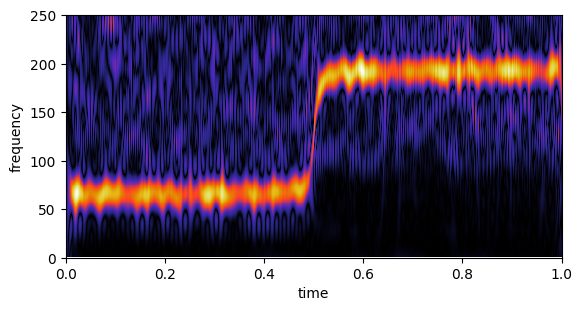

Use fft.


(0, 250)

In [21]:
# window size = N/32
tfrp=cohenclass.tfrpwv(z,NaN,NaN,NaN,NaN,NaN,0,"fft",32)
indfpwv32=extif.maxif(abs.(tfrp))
fig=PyPlot.figure()
a=juwplot.tfrshow(abs.(tfrp),dx,x[1],x[end],NaN,NaN,1.0)
PyPlot.xlabel("time")
PyPlot.ylabel("frequency")
PyPlot.ylim(0,250)

- In summary, there is a trade-off relation. The larger window size exhibits more artifact and finer resolution.  The small window size exhibits less artifact and poor resolution.    

### Then, the adaptive window solves the trade-off

In [22]:
fin=collect(linspace(1,512,1024));
varrat=ones(length(x))./(3.16*3.16);

In [34]:
### kappa=2.0, delta kappa=0.39, 
### ndiv_static_crit=4 i.e. accept the criterion if delta frequency < nsample/4
### use Hamming window
include("../pwvaw.jl")
tfra,windows=pwvaw.awpwv(z,varrat,NaN,NaN,fin,NaN,2.0,0.39,4,"Hamming");

Single pseudo Wigner Ville with the Adaptive Algorithm
Assuming nft = nsample.
Assuming nft = nsample.
Assuming nft = nsample.
Assuming nft = nsample.
Assuming nft = nsample.
Assuming nft = nsample.
Assuming nft = nsample.
Assuming nft = nsample.
Assuming nft = nsample.
Assuming nft = nsample.
Assuming nft = nsample.
Assuming nft = nsample.
Assuming nft = nsample.
Assuming nft = nsample.
Assuming nft = nsample.
Assuming nft = nsample.
Assuming nft = nsample.
Assuming nft = nsample.
Assuming nft = nsample.
Assuming nft = nsample.
Assuming nft = nsample.
Assuming nft = nsample.
Assuming nft = nsample.
Assuming nft = nsample.
Assuming nft = nsample.
Assuming nft = nsample.
Assuming nft = nsample.
Assuming nft = nsample.
Assuming nft = nsample.
Assuming nft = nsample.
Assuming nft = nsample.
Assuming nft = nsample.
Assuming nft = nsample.
Assuming nft = nsample.
Assuming nft = nsample.
Assuming nft = nsample.
Assuming nft = nsample.
Assuming nft = nsample.
Assuming nft = nsample.
Assuming 

Stacktrace:
 [1] depwarn(::String, ::Symbol) at ./deprecated.jl:70
 [2] abs(::Array{Complex{Float64},1}) at ./deprecated.jl:57
 [3] awpwv(::Array{Complex{Float64},1}, ::Array{Float64,1}, ::Float64, ::Float64, ::Array{Float64,1}, ::Float64, ::Float64, ::Float64, ::Int64, ::String, ::Int64, ::String, ::Bool) at /home/kawahara/juwvid/pwvaw.jl:96
 [4] awpwv(::Array{Complex{Float64},1}, ::Array{Float64,1}, ::Float64, ::Float64, ::Array{Float64,1}, ::Float64, ::Float64, ::Float64, ::Int64, ::String) at /home/kawahara/juwvid/pwvaw.jl:21
 [5] include_string(::String, ::String) at ./loading.jl:515
 [6] include_string(::Module, ::String, ::String) at /home/kawahara/anaconda3/share/julia/site/v0.6/Compat/src/Compat.jl:464
 [7] execute_request(::ZMQ.Socket, ::IJulia.Msg) at /home/kawahara/anaconda3/share/julia/site/v0.6/IJulia/src/execute_request.jl:154
 [8] eventloop(::ZMQ.Socket) at /home/kawahara/anaconda3/share/julia/site/v0.6/IJulia/src/eventloop.jl:8
 [9] (::IJulia.##14#17)() at ./task.jl:33

Assuming nft = nsample.
Assuming nft = nsample.
Assuming nft = nsample.
Assuming nft = nsample.
Assuming nft = nsample.
Assuming nft = nsample.
Assuming nft = nsample.
Assuming nft = nsample.
Assuming nft = nsample.
Assuming nft = nsample.
Assuming nft = nsample.
Assuming nft = nsample.
Assuming nft = nsample.
Assuming nft = nsample.
Assuming nft = nsample.
Assuming nft = nsample.
Assuming nft = nsample.
Assuming nft = nsample.
Assuming nft = nsample.
Assuming nft = nsample.
Assuming nft = nsample.
Assuming nft = nsample.
Assuming nft = nsample.
Assuming nft = nsample.
Assuming nft = nsample.
Assuming nft = nsample.
Assuming nft = nsample.
Assuming nft = nsample.
Assuming nft = nsample.
Assuming nft = nsample.
Assuming nft = nsample.
Assuming nft = nsample.
Assuming nft = nsample.
Assuming nft = nsample.
Assuming nft = nsample.
Assuming nft = nsample.
Assuming nft = nsample.
Assuming nft = nsample.
Assuming nft = nsample.
Assuming nft = nsample.
Assuming nft = nsample.
Assuming nft = n

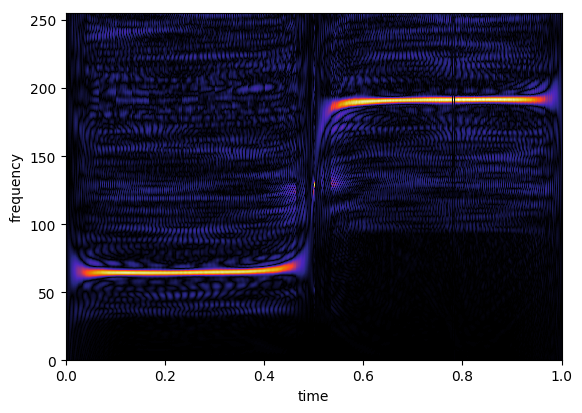

PyObject <matplotlib.text.Text object at 0x7ff38c76a0b8>

In [24]:
fig=PyPlot.figure()
a=juwplot.tfrshow(abs.(tfra),dx,x[1],x[end],fin[1],fin[end],0.7)
PyPlot.xlabel("time")
PyPlot.ylabel("frequency")

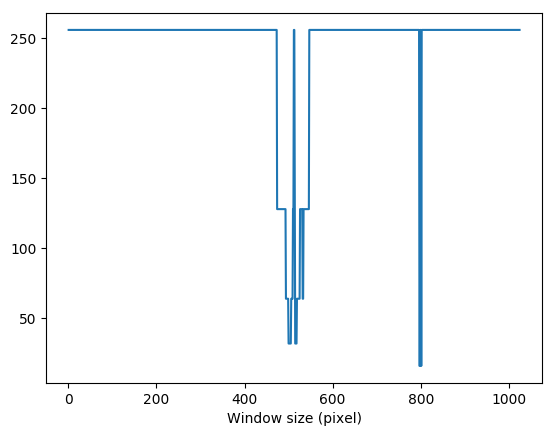

PyObject <matplotlib.text.Text object at 0x7ff38c89d7b8>

In [25]:
PyPlot.plot(collect(1:length(windows)),map(Float64,windows))
PyPlot.xlabel("time")
PyPlot.xlabel("Window size (pixel)")

In [26]:
indfn=extif.maxif(abs.(tfra));
fx=juwutils.index_to_frequency(indfn, fin, dx,nsample);

Assuming nft = nsample.


### Comparison between WV, PWV (fixed window=256 and 32), and  PWV (adaptive)
- red is input
- yellow (WV), green (pseudo WV, large window),orange  (pseudo WV, small window)
- blue (adaptive, pseudo WV) 

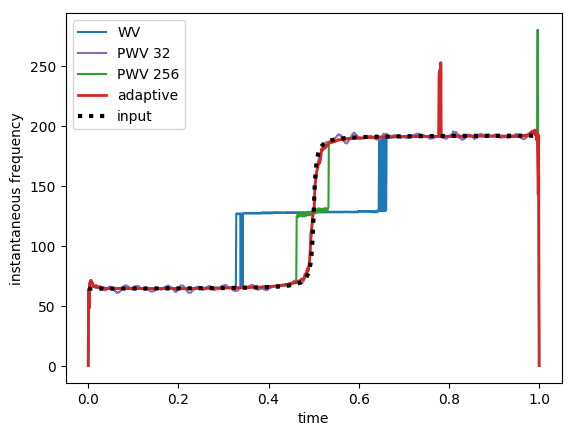

Assuming nft = nsample.
Assuming nft = nsample.
Assuming nft = nsample.


PyObject <matplotlib.legend.Legend object at 0x7ff387d49198>

In [33]:
fwv=juwutils.index_to_frequency(indfwv,NaN, dx,nsample);
fwv32=juwutils.index_to_frequency(indfpwv32,NaN, dx,nsample);
fwv256=juwutils.index_to_frequency(indfpwv256,NaN, dx,nsample);
PyPlot.xlabel("time")
PyPlot.ylabel("instantaneous frequency")
PyPlot.plot(x,fwv,color="C0",label="WV")
PyPlot.plot(x,fwv32,color="C4",label="PWV 32")
PyPlot.plot(x,fwv256,color="C2",label="PWV 256")
PyPlot.plot(x,fx,color="C3",lw=2,label="adaptive")
PyPlot.plot(x,abs.(iw/(2*pi)),color="black",lw=3, ls="dotted",label="input")
PyPlot.legend()